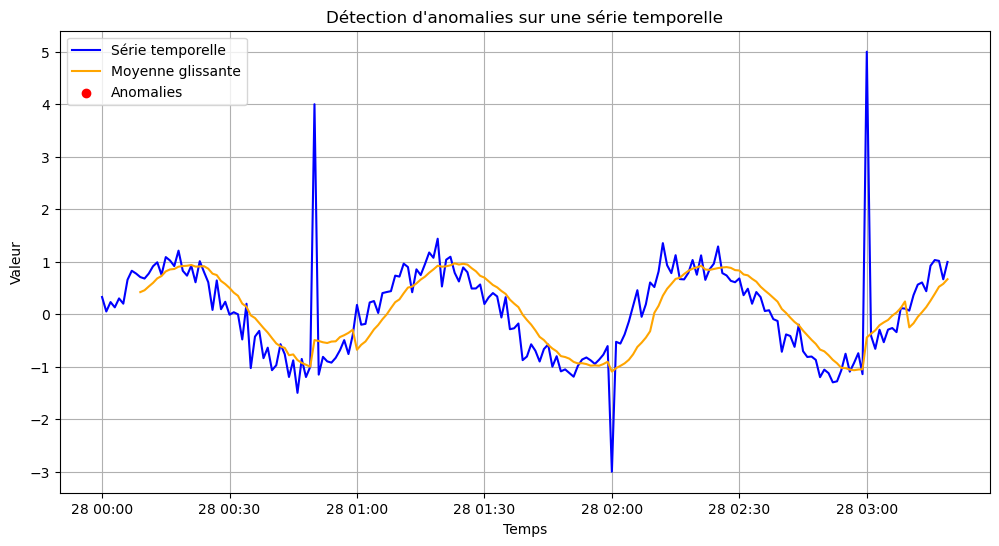

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Génération d'une série temporelle fictive ===
date_rng = pd.date_range(start="2025-08-28", periods=200, freq="min")
data = np.sin(np.linspace(0, 20, 200)) + np.random.normal(0, 0.2, 200)

# On injecte quelques anomalies artificielles
data[50] = 4
data[120] = -3
data[180] = 5

df = pd.DataFrame({"time": date_rng, "value": data})

# === Détection d'anomalies avec moyenne glissante ===
window = 10
df["rolling_mean"] = df["value"].rolling(window).mean()
df["rolling_std"] = df["value"].rolling(window).std()

# Un point est anormal si |x - moyenne| > 3 * std locale
df["anomaly"] = abs(df["value"] - df["rolling_mean"]) > 3 * df["rolling_std"]

# === Affichage ===
plt.figure(figsize=(12,6))
plt.plot(df["time"], df["value"], label="Série temporelle", color="blue")
plt.plot(df["time"], df["rolling_mean"], label="Moyenne glissante", color="orange")

# Mettre en évidence les anomalies
plt.scatter(df.loc[df["anomaly"], "time"], 
            df.loc[df["anomaly"], "value"], 
            color="red", label="Anomalies", zorder=5)

plt.title("Détection d'anomalies sur une série temporelle")
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.legend()
plt.grid(True)
plt.show()
